In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
Temp = './TEMP/Resources/Temperature2.csv'
TempDf = pd.read_csv(Temp)

Pop = './POP/Resources/pop.csv'
PopDf = pd.read_csv(Pop)

PopDf.rename(columns={'Country Name':'Country', 'year':'Year'}, inplace=True)
TempDf.rename(columns={'Country Name':'Country', 'year':'Year'}, inplace=True)

In [47]:
PopDf.head()

,Country,Year,Indicator Name,Indicator Code,Country Code,POP
0,aruba,1960,Population growth (annual %),SP.POP.GROW,ABW,3.148037
1,afghanistan,1960,Population growth (annual %),SP.POP.GROW,AFG,1.816077
2,angola,1960,Population growth (annual %),SP.POP.GROW,AGO,1.903517
3,albania,1960,Population growth (annual %),SP.POP.GROW,ALB,3.015423
4,andorra,1960,Population growth (annual %),SP.POP.GROW,AND,7.050663


In [48]:
TempDf.head()

,Unnamed: 0,Country,Year,AverageTemperature,Standard Deviation
0,0,afghanistan,1960,15.051182,8.919992
1,1,afghanistan,1961,14.064917,9.684162
2,2,afghanistan,1962,13.768667,9.143732
3,3,afghanistan,1963,15.033417,8.857023
4,4,afghanistan,1964,13.084917,10.401564


In [49]:
TempPop = pd.merge(TempDf,PopDf,how='left', left_on=['Country','Year'],right_on=['Country','Year'])

In [50]:
TempPop.head()

,Unnamed: 0,Country,Year,AverageTemperature,Standard Deviation,Indicator Name,Indicator Code,Country Code,POP
0,0,afghanistan,1960,15.051182,8.919992,Population growth (annual %),SP.POP.GROW,AFG,1.816077
1,1,afghanistan,1961,14.064917,9.684162,Population growth (annual %),SP.POP.GROW,AFG,1.876528
2,2,afghanistan,1962,13.768667,9.143732,Population growth (annual %),SP.POP.GROW,AFG,1.934999
3,3,afghanistan,1963,15.033417,8.857023,Population growth (annual %),SP.POP.GROW,AFG,1.992521
4,4,afghanistan,1964,13.084917,10.401564,Population growth (annual %),SP.POP.GROW,AFG,2.049423


Please type the country you would like to analyze: russia


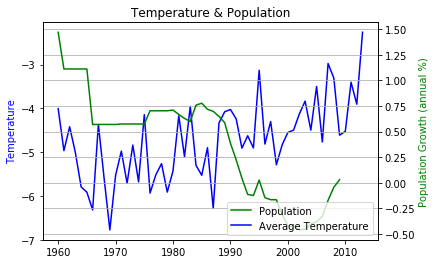

In [51]:
Country = input ("Please type the country you would like to analyze: ").lower()

CountryPlt = TempPop[TempPop['Country'] == Country]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

TempY, = ax1.plot(CountryPlt['Year'], CountryPlt['AverageTemperature'], color="blue", label="Average Temperature")
PopY, = ax2.plot(CountryPlt['Year'], CountryPlt['POP'], color="green",label='Population')

plt.title("Temperature & Population")
ax1.set_ylabel('Temperature', color='b')
ax2.set_ylabel('Population Growth (annual %)', color='green')
plt.grid(True)

plt.legend(handles=[PopY, TempY], loc="lower right")

plt.savefig("./Images/Temperature&Population.png")
plt.show()

In [52]:
from ipywidgets import widgets, interactive

In [53]:
drop_country = widgets.Dropdown(
    options= ['All'] + list(TempPop['Country'].unique()),
    value='All',
    description='Country:',
)
 # Se crea un dropdown del año inicial
drop_start_year = widgets.Dropdown(
    options= list(TempPop['Year'].unique()),
    value = TempPop['Year'].min(),
    description='Start Year:',
)

    # Se crea un dropdown del año final
drop_end_year = widgets.Dropdown(
    options= ['All'] + list(TempPop['Year'].unique()),
    value= TempPop['Year'].max(),
    description='End Year:',
)

In [54]:
try:
    def plotit(drop_country, drop_start_year, drop_end_year):
        country_pop_pip_plt_2 = TempPop.copy()
    
        if drop_country != 'All':
            country_pop_pip_plt_2 = country_pop_pip_plt_2[country_pop_pip_plt_2.Country == drop_country]

        # Filtra el maximo y el minimo
        country_pop_pip_plt_2 = country_pop_pip_plt_2[(country_pop_pip_plt_2.Year >= drop_start_year) & (country_pop_pip_plt_2.Year <= drop_end_year)]

        country_pop_pip_plt_2["POP"] = pd.to_numeric(country_pop_pip_plt_2["POP"])
        country_pop_pip_plt_2["Year"] = pd.to_numeric(country_pop_pip_plt_2["Year"])
    
        country_pop_pip_plt_2 = country_pop_pip_plt_2.reset_index()
      
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        TempY, = ax1.plot(country_pop_pip_plt_2['Year'], country_pop_pip_plt_2['AverageTemperature'], color="blue", label="Average Temperature")
        PopY, = ax2.plot(country_pop_pip_plt_2['Year'], country_pop_pip_plt_2['POP'], color="green",label='Population')

        plt.title("Temperature & Population")
        ax1.set_ylabel('Temperature', color='b')
        ax2.set_ylabel('Population Growth (annual %)', color='green')
        plt.grid(True)

        plt.legend(handles=[PopY, TempY], loc="lower right")        
        
        plt.show();       
except:
    print("Error al realizar la grafica dinamica")

In [55]:
interactive(plotit, drop_country=drop_country, drop_start_year=drop_start_year, drop_end_year=drop_end_year)

interactive(children=(Dropdown(description='Country:', options=('All', 'afghanistan', 'africa', 'albania', 'al…